In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

pd.options.mode.chained_assignment = None

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Juntamos los archivos en uno mismo y lo convertimos en un nuevo archivo .csv

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/cobros.csv', sep='|', decimal=',',encoding='utf-8')
df2=pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/PAGOS.csv', sep=',', decimal=',',encoding='utf-8')
df3=pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/SALDOS.csv', sep=',', decimal=',',encoding='utf-8')

In [ ]:
resultado1 = pd.concat([df1, df2, df3], axis=1, ignore_index= False )
resultado1.to_csv('Datosconjuntos.csv' )

In [3]:
df=pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/Datosconjuntos.csv', sep=',', decimal=',',encoding='utf-8')
df

<ipython-input-3-4aa69df174c3>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/Datosconjuntos.csv', sep=',', decimal=',',encoding='utf-8')


,Unnamed: 0,Año,Trimestre,Den_Sociedad_Financiera,Id_Cuenta_Banco_Tesorería,Den_Entidad_Financiera,Id_Entidad_Sucursal,Número_Cobros,"Importe_Cobros,Año",Trimestre.1,...,Id_Cuenta_Banco_Tesorería.3,Den_Entidad_Financiera.3,Id_Entidad_Sucursal.3,Tesorería.2,Trimestre.3,Saldo_medio,Saldo_inicial,Saldo_final,Saldo_mínimo,Saldo_máximo
0,0,S.A.,2080-1133,390,"8283036.74,,",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,S.A.,0182-5566,33,"2185483.29,,",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,S.A.,2100-8688,1603,"3020869.52,,",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,S.C.C.,3058-3501,290,"689464.54,,",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,S.A.,0049-6726,515,"2206700.29,,",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833145,5833145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5833146,5833146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5833147,5833147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5833148,5833148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos el tamaño de nuestro dataframe

In [5]:
print(df.shape)
print(df.dtypes)

(5833150, 168)
Unnamed: 0                    int64
Año                          object
Trimestre                    object
Den_Sociedad_Financiera      object
Id_Cuenta_Banco_Tesorería    object
                              ...  
Saldo_medio                  object
Saldo_inicial                object
Saldo_final                  object
Saldo_mínimo                 object
Saldo_máximo                 object
Length: 168, dtype: object


Ahora veamos cuáles son númericas y cuáles no

In [6]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'Trimestre.1' 'Clasificación_Presupuesto_Tesorería'
 'Número_Cobros.1' 'Importe_Cobros,Año.1' 'Id_Sociedad_Financiera'
 'Den_Sociedad_Financiera.1' 'Id_Documento_Cobro' 'Fecha_Documento_Cobro'
 'Clase_Documento_Cobro' 'Den_ Clase_Documento_Cobro' 'Número_Documento_R'
 'Clasificación_Presupuesto_Tesorería.1' 'Tesorería'
 'Id_Cuenta_Banco_Tesorería.1' 'Den_Entidad_Financiera.1'
 'Id_Entidad_Sucursal.1' 'Fecha_Movimiento' 'Id_Libro_Mayor'
 'Den_Libro_Mayor' 'Id_Partida_Presupuestaria'
 'Den_ Partida_Presupuestaria' 'Importe' 'Unnamed: 29' '0100'
 'PRES. DE LA JA Y CONS. PRESID. ADMÓN. PÚB. E INT.' '2022' '0190463394'
 '20220401' 'GENERAL MACHINES TECHNOLOGY SL' 'B91509281'
 '0100010000G/11A/22709/000000000001' 'OTROS' '2022.1'
 '00000000000000000000000000000000000000000120549485' 'SERVIC' 'Servicios'
 'CONTR' '2016' '0000131768' 'ASANT' 'BANCO SANTANDER, S.A.' '0049-6726'
 'PROVEEDORES' '10000.08 ' '10000.08 .1' '0190891561' '20220701'
 'CENTRO DE JARDINERIA Y OCIO LUIS MORE

In [7]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Año' 'Trimestre' 'Den_Sociedad_Financiera' 'Id_Cuenta_Banco_Tesorería'
 'Den_Entidad_Financiera' 'Id_Entidad_Sucursal' 'Número_Cobros'
 'Importe_Cobros,Año' 'Id_Sociedad_Financiera.1'
 'Den_Sociedad_Financiera.2' 'Id_Sección_Presupuestaria'
 'Den_Sección_Presupuestaria' 'Año_Documento_Pago' 'Id_Documento_Pago'
 'Fecha_Pago' 'Den_Acreedor' 'NIF_Acreedor' 'Id_Cesionario'
 'Id_Partida_Presupuestaria.1' 'Den_ Partida_Presupuestaria.1'
 'Id_Cuenta_Mayor' 'Den_Cuenta_Mayor' 'Tesorería_Pagadora'
 'Año_Expediente_Contable' 'Id_Expediente_Contable'
 'Id_Procedimiento_Contable' 'Den_Procedimiento_Contable'
 'Clase_Expediente_Sub-Cont' 'Año_Expediente_Sub-Cont'
 'Número_Expediente_Sub-Cont' 'Id_Cuenta_Banco_Tesorería.2'
 'Den_Entidad_Financiera.2' 'Id_Entidad_Sucursal.2'
 'Den_Clasificación_Presupuesto_Tesorería' 'Importe_Bruto'
 'Importe_Retenciones' 'Importe_Neto' '1000' 'Junta de Andalucía' '1300'
 'CONS. DE AGRIC.,GANADERIA,PESCA Y DESARR. SOSTENIB' '2021' '0192927782'
 '20220104' 'AYUNTAMI

Vemos el porcentaje de datos faltantes de las columnas

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Año - 99%
Trimestre - 99%
Den_Sociedad_Financiera - 99%
Id_Cuenta_Banco_Tesorería - 99%
Den_Entidad_Financiera - 99%
Id_Entidad_Sucursal - 100%
Número_Cobros - 100%
Importe_Cobros,Año - 99%
Trimestre.1 - 100%
Clasificación_Presupuesto_Tesorería - 100%
Número_Cobros.1 - 100%
Importe_Cobros,Año.1 - 100%
Id_Sociedad_Financiera - 100%
Den_Sociedad_Financiera.1 - 100%
Id_Documento_Cobro - 100%
Fecha_Documento_Cobro - 100%
Clase_Documento_Cobro - 100%
Den_ Clase_Documento_Cobro - 100%
Número_Documento_R - 100%
Clasificación_Presupuesto_Tesorería.1 - 100%
Tesorería - 100%
Id_Cuenta_Banco_Tesorería.1 - 100%
Den_Entidad_Financiera.1 - 100%
Id_Entidad_Sucursal.1 - 100%
Fecha_Movimiento - 100%
Id_Libro_Mayor - 100%
Den_Libro_Mayor - 100%
Id_Partida_Presupuestaria - 100%
Den_ Partida_Presupuestaria - 100%
Importe - 100%
Id_Sociedad_Financiera.1 - 16%
Den_Sociedad_Financiera.2 - 16%
Id_Sección_Presupuestaria - 18%
Den_Sección_Presupuestaria - 18%
Año_Documento_Pago - 16%
Id_Document

Hay muchas que tienen un alto porcentaje, y vamos a eliminarlas

In [9]:
import pandas as pd



# Calculamos de nuevo el porcentaje de datos faltantes por columna
porcentaje_faltantes_por_columna = (df.isnull().sum() / len(df)) * 100

# Establezco un umbral del 80%
umbral = 80

# Filtro las columnas que no superen el umbral de datos faltantes
columnas_a_mantener = porcentaje_faltantes_por_columna[porcentaje_faltantes_por_columna <= umbral].index

# Creo un nuevo DataFrame solo con las columnas a mantener
df = df[columnas_a_mantener]

# Ahora, 'df' contiene solo las columnas que no superan el umbral de datos faltantes (80% o menos).


Volvemos a mirar el porcentaje de datos faltantes, tras eliminar aquellas columnas que superan el umbral de datos faltantes establecido previamente.


In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Id_Sociedad_Financiera.1 - 16%
Den_Sociedad_Financiera.2 - 16%
Id_Sección_Presupuestaria - 18%
Den_Sección_Presupuestaria - 18%
Año_Documento_Pago - 16%
Id_Documento_Pago - 16%
Fecha_Pago - 16%
Den_Acreedor - 16%
NIF_Acreedor - 64%
Id_Partida_Presupuestaria.1 - 18%
Den_ Partida_Presupuestaria.1 - 18%
Tesorería_Pagadora - 16%
Año_Expediente_Contable - 16%
Id_Expediente_Contable - 17%
Id_Procedimiento_Contable - 17%
Den_Procedimiento_Contable - 17%
Clase_Expediente_Sub-Cont - 70%
Año_Expediente_Sub-Cont - 16%
Número_Expediente_Sub-Cont - 70%
Id_Cuenta_Banco_Tesorería.2 - 16%
Den_Entidad_Financiera.2 - 16%
Id_Entidad_Sucursal.2 - 16%
Den_Clasificación_Presupuesto_Tesorería - 16%
Importe_Bruto - 16%
Importe_Retenciones - 16%
Importe_Neto - 16%


Ahora seguimos el mismo proceso, pero con las filas

In [11]:
print("Longitud original:", len(df))
# Calculo el porcentaje de datos faltantes por fila
porcentaje_faltantes_por_fila = (df.isnull().sum(axis=1) / len(df.columns)) * 100

# Establezco un umbral del 15%
umbral = 15

# Elimino las filas que superen el umbral de datos faltantes
df = df.dropna(thresh=len(df.columns) - (umbral / 100 * len(df.columns)))

# Verifico la longitud después de la eliminación
print("Longitud después de la eliminación:", len(df))

Longitud original: 5833150
Longitud después de la eliminación: 4781467


Repito el proceso varias veces, hasta conseguir anular ese porcentaje.


In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Id_Sociedad_Financiera.1 - 0%
Den_Sociedad_Financiera.2 - 0%
Id_Sección_Presupuestaria - 0%
Den_Sección_Presupuestaria - 0%
Año_Documento_Pago - 0%
Id_Documento_Pago - 0%
Fecha_Pago - 0%
Den_Acreedor - 0%
NIF_Acreedor - 57%
Id_Partida_Presupuestaria.1 - 0%
Den_ Partida_Presupuestaria.1 - 0%
Tesorería_Pagadora - 0%
Año_Expediente_Contable - 0%
Id_Expediente_Contable - 0%
Id_Procedimiento_Contable - 0%
Den_Procedimiento_Contable - 0%
Clase_Expediente_Sub-Cont - 63%
Año_Expediente_Sub-Cont - 0%
Número_Expediente_Sub-Cont - 63%
Id_Cuenta_Banco_Tesorería.2 - 0%
Den_Entidad_Financiera.2 - 0%
Id_Entidad_Sucursal.2 - 0%
Den_Clasificación_Presupuesto_Tesorería - 0%
Importe_Bruto - 0%
Importe_Retenciones - 0%
Importe_Neto - 0%


Elimino aquellas columnas que siguen teniendo un alto porcentaje de datos faltantes.


In [13]:
to_drop=['Número_Expediente_Sub-Cont','Clase_Expediente_Sub-Cont']
df.drop(to_drop, inplace=True, axis=1)

In [14]:
to_drop=['NIF_Acreedor']
df.drop(to_drop, inplace=True, axis=1)

In [15]:
print("Longitud original:", len(df))
# Calculo el porcentaje de datos faltantes por fila
porcentaje_faltantes_por_fila = (df.isnull().sum(axis=1) / len(df.columns)) * 100

# Establezco un umbral del 1%
umbral = 1

# Elimino las filas que superen el umbral de datos faltantes
df = df.dropna(thresh=len(df.columns) - (umbral / 100 * len(df.columns)))

# Verific la longitud después de la eliminación
print("Longitud después de la eliminación:", len(df))

Longitud original: 4781467
Longitud después de la eliminación: 4780831


Vuelvo a ver, que variables son numéricas

In [16]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0']


In [17]:
print(df.shape)
print(df.dtypes)

(4780831, 24)
Unnamed: 0                                  int64
Id_Sociedad_Financiera.1                   object
Den_Sociedad_Financiera.2                  object
Id_Sección_Presupuestaria                  object
Den_Sección_Presupuestaria                 object
Año_Documento_Pago                         object
Id_Documento_Pago                          object
Fecha_Pago                                 object
Den_Acreedor                               object
Id_Partida_Presupuestaria.1                object
Den_ Partida_Presupuestaria.1              object
Tesorería_Pagadora                         object
Año_Expediente_Contable                    object
Id_Expediente_Contable                     object
Id_Procedimiento_Contable                  object
Den_Procedimiento_Contable                 object
Año_Expediente_Sub-Cont                    object
Id_Cuenta_Banco_Tesorería.2                object
Den_Entidad_Financiera.2                   object
Id_Entidad_Sucursal.2               

In [18]:
df

,Unnamed: 0,Id_Sociedad_Financiera.1,Den_Sociedad_Financiera.2,Id_Sección_Presupuestaria,Den_Sección_Presupuestaria,Año_Documento_Pago,Id_Documento_Pago,Fecha_Pago,Den_Acreedor,Id_Partida_Presupuestaria.1,...,Id_Procedimiento_Contable,Den_Procedimiento_Contable,Año_Expediente_Sub-Cont,Id_Cuenta_Banco_Tesorería.2,Den_Entidad_Financiera.2,Id_Entidad_Sucursal.2,Den_Clasificación_Presupuesto_Tesorería,Importe_Bruto,Importe_Retenciones,Importe_Neto
0,0,1000.0,Junta de Andalucía,1300.0,"CONS. DE AGRIC.,GANADERIA,PESCA Y DESARR. SOST...",2021.0,192927782.0,20220104.0,AYUNTAMIENTO DE EL PUERTO DE SANTA MARIA,1300110000G/71H/78600/00C16B1921G52016000570,...,SUBV,Subvenciones y Transferencias,2020.0,UNFD2,"UNICAJA BANCO, S.A.",2103-0722,FONDO ANDALUZ DE GARANTÍA AGRARIA,87956.88,0.00,87956.88
1,1,1000.0,Junta de Andalucía,1300.0,"CONS. DE AGRIC.,GANADERIA,PESCA Y DESARR. SOST...",2021.0,192927783.0,20220104.0,AYUNTAMIENTO DE EL PUERTO DE SANTA MARIA,1300110000G/71H/78600/00C16B1921G52016000570,...,SUBV,Subvenciones y Transferencias,2020.0,UNFC2,"UNICAJA BANCO, S.A.",2103-0722,FONDO ANDALUZ DE GARANTÍA AGRARIA,9772.99,0.00,9772.99
2,2,1000.0,Junta de Andalucía,1300.0,"CONS. DE AGRIC.,GANADERIA,PESCA Y DESARR. SOST...",2021.0,192927379.0,20220104.0,UNION DE CRIADORES DE TOROS DE LIDIA,1300110000G/71B/78202/00C14A1021G12016000430,...,SUBV,Subvenciones y Transferencias,2021.0,UNFD2,"UNICAJA BANCO, S.A.",2103-0722,FONDO ANDALUZ DE GARANTÍA AGRARIA,82990.50,0.00,82990.50
3,3,1000.0,Junta de Andalucía,1300.0,"CONS. DE AGRIC.,GANADERIA,PESCA Y DESARR. SOST...",2021.0,192927380.0,20220104.0,UNION DE CRIADORES DE TOROS DE LIDIA,1300110000G/71B/78202/00C14A1021G12016000430,...,SUBV,Subvenciones y Transferencias,2021.0,UNFC2,"UNICAJA BANCO, S.A.",2103-0722,FONDO ANDALUZ DE GARANTÍA AGRARIA,27663.50,0.00,27663.50
4,4,1000.0,Junta de Andalucía,1300.0,"CONS. DE AGRIC.,GANADERIA,PESCA Y DESARR. SOST...",2021.0,192927780.0,20220104.0,CONSEJO REGULADOR DENOMINACION DE ORIGEN,1300110000G/71E/74801/00C13A0323GO2016000402,...,SUBV,Subvenciones y Transferencias,2021.0,UNFD2,"UNICAJA BANCO, S.A.",2103-0722,FONDO ANDALUZ DE GARANTÍA AGRARIA,32186.50,0.00,32186.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924639,4924639,2312.0,Cons.Fernando de los Rios,140.0,CONSORCIO FERNANDO DE LOS RÍOS,2022.0,190001861.0,20221229.0,CENTRO DE ESTUDIOS MUNICIPALES Y DE COOPERACIO...,0140010000G/12D/22706/000000000001,...,SERVIC,Servicios,2022.0,ASANT,"BANCO SANTANDER, S.A.",0049-6726,PROVEEDORES,185.00,0.00,185.00
4924640,4924640,2312.0,Cons.Fernando de los Rios,140.0,CONSORCIO FERNANDO DE LOS RÍOS,2022.0,190001862.0,20221229.0,CENTRO DE ESTUDIOS MUNICIPALES Y DE COOPERACIO...,0140010000G/12D/22706/000000000001,...,SERVIC,Servicios,2022.0,ASANT,"BANCO SANTANDER, S.A.",0049-6726,PROVEEDORES,185.00,0.00,185.00
4924641,4924641,2312.0,Cons.Fernando de los Rios,140.0,CONSORCIO FERNANDO DE LOS RÍOS,2022.0,190001863.0,20221229.0,JESUS ALFONSO MUÑOZ JIMENEZ,0140010000G/12D/22706/000000000001,...,SERVIC,Servicios,2022.0,ASANT,"BANCO SANTANDER, S.A.",0049-6726,PROVEEDORES,4840.00,600.00,4240.00
4924642,4924642,2312.0,Cons.Fernando de los Rios,140.0,CONSORCIO FERNANDO DE LOS RÍOS,2022.0,190001864.0,20221229.0,ESPUBLICO SERVICIOS PARA LA ADMINISTRACION SA,0140010000G/12D/21600/000000000001,...,SERVIC,Servicios,2021.0,ASANT,"BANCO SANTANDER, S.A.",0049-6726,PROVEEDORES,3003.64,0.00,3003.64


Empiezo con las etapas del proceso KDD

# ETAPA 1

Empezamos con la etapa de selección, y decido quedarme solo con esas 4 columnas, ya que son las que he visto más relevantes

In [19]:
import pandas as pd


# Lista de atributos relevantes para el análisis
atributos_relevantes = ['Importe_Neto','Importe_Bruto' , 'Importe_Retenciones','Den_Entidad_Financiera.2']

# Selecciono solo los atributos relevantes
data_seleccionada = df[atributos_relevantes]

# visualizo la nueva tabla de datos seleccionada
print(data_seleccionada.head())

# Guardo la tabla de datos seleccionada en un nuevo archivo si es necesario
data_seleccionada.to_csv('datos_seleccionados.csv', index=False)

  Importe_Neto Importe_Bruto Importe_Retenciones Den_Entidad_Financiera.2
0    87956.88      87956.88                0.00       UNICAJA BANCO, S.A.
1     9772.99       9772.99                0.00       UNICAJA BANCO, S.A.
2    82990.50      82990.50                0.00       UNICAJA BANCO, S.A.
3    27663.50      27663.50                0.00       UNICAJA BANCO, S.A.
4    32186.50      32186.50                0.00       UNICAJA BANCO, S.A.


In [3]:
data = pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/datos_seleccionados.csv')

<ipython-input-3-14ea8b304921>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/datos_seleccionados.csv')


# ETAPA 2

Empiezo viendo unos gráficos de los datos seleccionados

In [4]:

data

,Importe_Neto,Importe_Bruto,Importe_Retenciones,Den_Entidad_Financiera.2
0,87956.88,87956.88,0.0,"UNICAJA BANCO, S.A."
1,9772.99,9772.99,0.0,"UNICAJA BANCO, S.A."
2,82990.50,82990.50,0.0,"UNICAJA BANCO, S.A."
3,27663.50,27663.50,0.0,"UNICAJA BANCO, S.A."
4,32186.50,32186.50,0.0,"UNICAJA BANCO, S.A."
...,...,...,...,...
5833145,NaN,NaN,NaN,NaN
5833146,NaN,NaN,NaN,NaN
5833147,NaN,NaN,NaN,NaN
5833148,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
data['Importe_Neto'].plot(kind='hist', bins=20, title='Importe_Neto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Importe_Bruto'].plot(kind='hist', bins=20, title='Importe_Bruto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Importe_Retenciones'].plot(kind='hist', bins=20, title='Importe_Retenciones')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Importe_Neto', y='Importe_Bruto', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Importe_Bruto', y='Importe_Retenciones', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Importe_Neto'].plot(kind='line', figsize=(8, 4), title='Importe_Neto')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Importe_Bruto'].plot(kind='line', figsize=(8, 4), title='Importe_Bruto')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Importe_Retenciones'].plot(kind='line', figsize=(8, 4), title='Importe_Retenciones')
plt.gca().spines[['top', 'right']].set_visible(False)

Voy a asignar un número a cada entidad bancaria, para mi futuro análisis

In [5]:
import pandas as pd

# Utilizo la función factorize() para asignar números a las categorías en la columna "Den_Entidad_Financiera.2"
data['Den_Entidad_Financiera.2'], unique_categories = pd.factorize(data['Den_Entidad_Financiera.2'])

# La columna 'Den_Entidad_Financiera.2' ahora contiene números en lugar de categorías
categorias_numeros_data = pd.DataFrame({'Categoria': unique_categories, 'Numero': range(len(unique_categories))})

# Muestro el nuevo DataFrame
print(categorias_numeros_data)

                               Categoria  Numero
0                    UNICAJA BANCO, S.A.       0
1                        CAIXABANK, S.A.       1
2                  BANCO SANTANDER, S.A.       2
3             CAJAMAR CAJA RURAL, S.C.C.       3
4      ABANCA CORPORACION BANCARIA, S.A.       4
5                        BANCO DE ESPA/A       5
6           INSTITUTO DE CREDITO OFICIAL       6
7  BANCO BILBAO VIZCAYA ARGENTARIA, S.A.       7


In [6]:
# Detecto y elimino valores outlier

z_scores = (data - data.mean()) / data.std()
threshold = 3

# Identifico outliers
outliers = data[(z_scores > threshold) | (z_scores < -threshold)]

# Elimino outliers del DataFrame
df_no_outliers = data[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]

# Muestro el nº de outliers eliminados
print(f"Number of outliers removed: {len(outliers)}")

# Muestro el tamaño del DataFrame después de eliminar los outliers
print(f"Shape of DataFrame after removing outliers: {df_no_outliers.shape}")

Number of outliers removed: 5833150
Shape of DataFrame after removing outliers: (5687999, 4)


In [7]:
datas=df_no_outliers

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Manejo de datos faltantes
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(datas), columns=data.columns)

# Escalamiento de características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(datas)

# Convierte los datos escalados de nuevo a un DataFrame si es necesario
data_scaled_df = pd.DataFrame(data_scaled, columns=datas.columns)

# Guardo los datos preprocesados en un nuevo archivo si es necesario
data_scaled_df.to_csv('datos_preprocesados.csv', index=False)


# ETAPA 3

In [3]:
df=pd.read_csv('/content/drive/MyDrive/datosTFM/Andalucía/datos_preprocesados.csv')

Convierto a variables númericas las referentes a los importe, ya que a pesar de ser números, no estaban consideradas como tal

In [4]:
# Convertir la columna a numérica
df['Importe_Neto'] = pd.to_numeric(df['Importe_Neto'], errors='coerce')
df['Importe_Bruto'] = pd.to_numeric(df['Importe_Bruto'], errors='coerce')
df['Importe_Retenciones'] = pd.to_numeric(df['Importe_Retenciones'], errors='coerce')

In [5]:
print("Longitud original:", len(df))
# Calculo el porcentaje de datos faltantes por fila
porcentaje_faltantes_por_fila = (df.isnull().sum(axis=1) / len(df.columns)) * 100

# Establezco un umbral del 15%
umbral = 1

# Elimino las filas que superen el umbral de datos faltantes
df2 = df.dropna(thresh=len(df.columns) - (umbral / 100 * len(df.columns)))

# Verifico la longitud después de la eliminación
print("Longitud después de la eliminación:", len(df2))

Longitud original: 5687999
Longitud después de la eliminación: 4779493


# ETAPA 4

Comienzo creando la matriz de correlación, para ver como de correlacionadas están las variables y posteriormente realizo un modelo de regresión, en la que quiero predecir cual va a ser el importe retenido en función de la entidad bancaria y del importe bruto y neto.

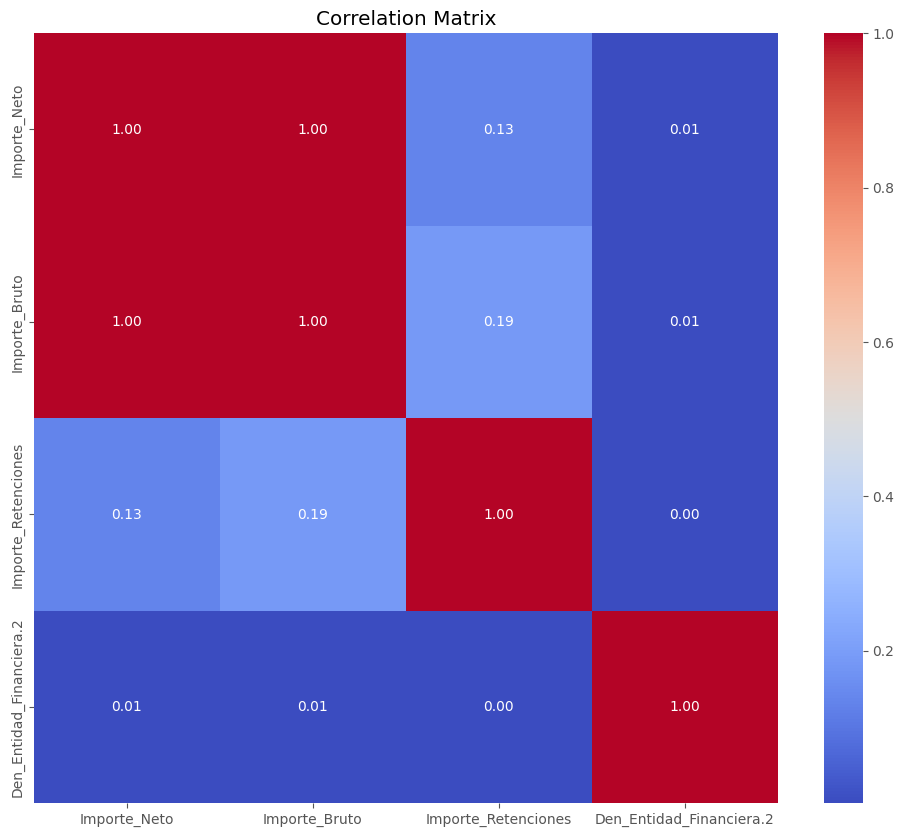

In [6]:
# Matriz de correlación
import matplotlib.pyplot as plt
# Calculamos la matriz de correlación
correlation_matrix = df.corr()
# Representación de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Modelo de regresión
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionamos la variable objetivo y las variables características
features = ['Importe_Neto', 'Importe_Retenciones', 'Den_Entidad_Financiera.2']
target = 'Importe_Bruto'

# Creamos la matriz características (X) and el vector objetivo (y)
X = df2[features]
y = df2[target]

# Dividimos los datos en conjunyos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.7959316332380874e-31


# ETAPA 5

Comienzo con la etapa de evaluación y viualización de resultados, comparando los valores reales, con las predicciones

In [8]:
# Muestro las predicciones junto con los valores reales
import pandas as pd
resultados = pd.DataFrame({'Valor_Real': y_test, 'Predicciones': y_pred})
print(resultados)

         Valor_Real  Predicciones
1746845   -0.103040     -0.103040
334490    -0.100784     -0.100784
1016878   -0.102547     -0.102547
3605615   -0.039656     -0.039656
1109678   -0.095966     -0.095966
...             ...           ...
999865    -0.095652     -0.095652
3902454   -0.075373     -0.075373
3357622   -0.051577     -0.051577
79931     -0.068245     -0.068245
808664    -0.103040     -0.103040

[955899 rows x 2 columns]


In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculo métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'MAE: {mae}')


MSE: 2.7959316332380874e-31
R²: 1.0
MAE: 5.89277656289863e-17


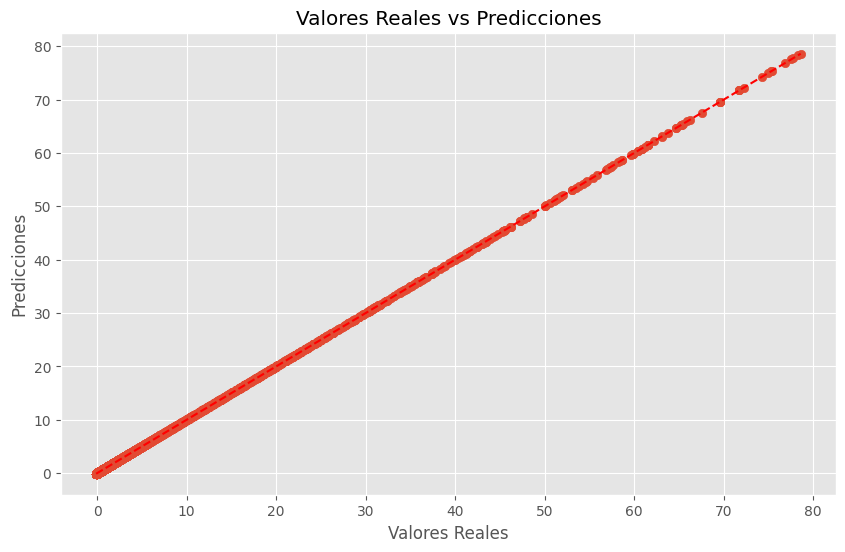

In [10]:
# Gráfico de valores reales vs predicciones

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()
